##  Random Forest

1. Module and Environment set up
2. Data import and understanding
3. Missing value treatment
4. Feature transformation
5. Feature selection
6. Random Forest modelling and validation with different parameters

### Module and Environment

In [1]:
# Import Libraries required for the experiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer,MinMaxScaler,RobustScaler,StandardScaler
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
import collections
np.random.seed(132)
# Initiate Seaborn Package with a particular Style
sns.set(style="ticks", color_codes=True)

In [2]:
# Initiate Encoders which will be used for Categorical Variables
label_encoder = LabelEncoder()

# Prints all line without skipping
pd.set_option('display.max_rows', None)
# Prints all columns without skipping
pd.set_option('display.max_columns', None)

In [3]:
os.getcwd()

'C:\\Users\\yogal\\Projects\\Coaching\\29July_Materials\\ML Algorithms - Copy\\Random Forest'

In [4]:
os.chdir('C:\\Users\\yogal\\Projects\\Coaching\\29July_Materials\\ML Algorithms - Copy\\Random Forest')

### Data Snapshot

In [5]:
# load the raw input dataset
bookings=pd.read_csv(r'hotel-booking-demand/hotel_bookings.csv')
bookings.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
bookings.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [8]:
bookings.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [9]:
#Assign Temporary Storage of the core dataset (For larger sets this step must be avoided)
temp = bookings.copy()

In [10]:
temp.columns[[3,5,6,13,22,23,29]]

Index(['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'country', 'deposit_type', 'agent',
       'total_of_special_requests'],
      dtype='object')

In [11]:
temp=temp.drop(temp.columns[[3,5,6,13,22,23,29]],axis=1)

### Missing Value Treatment

In [12]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]
print(null_columns)

# Identify Categorical Variables manually
temp1=temp.head()
temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]] = temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]].astype(str)

Index(['children', 'company'], dtype='object')


C:\Users\yogal\miniconda3\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [13]:
temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]].head()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,assigned_room_type,booking_changes,days_in_waiting_list,adr
0,Resort Hotel,0,July,0,0,Direct,Direct,0,0,C,3,0,0.0
1,Resort Hotel,0,July,0,0,Direct,Direct,0,0,C,4,0,0.0
2,Resort Hotel,0,July,0,1,Direct,Direct,0,0,C,0,0,75.0
3,Resort Hotel,0,July,0,1,Corporate,Corporate,0,0,A,0,0,75.0
4,Resort Hotel,0,July,0,2,Online TA,TA/TO,0,0,A,0,0,98.0


In [14]:
print(null_columns)

Index(['children', 'company'], dtype='object')


In [15]:
categoric_variables = temp1.columns[temp1.dtypes=='object']

# Categorical Imputation
for i in range(0,len(categoric_variables)):
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(np.nan,temp[categoric_variables[i]].mode()[0])
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(to_replace ="NaN", value = temp[categoric_variables[i]].mode()[0])
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(to_replace ="nan", value = temp[categoric_variables[i]].mode()[0])

    # Numeric Imputation
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.nan, strategy="mean")

# Mean Imputation for Numeric Variables
numeric_variables = set(temp.columns) - set(categoric_variables)
i=1
for i in range(0,len(numeric_variables)):
    if(temp.columns[i] in numeric_variables):
       temp.iloc[:,[i]] = mean_imp.fit_transform(temp.iloc[:,[i]])
       temp[temp.columns[i]]=temp[temp.columns[i]].replace(to_replace ="NaN",value =0)
       temp[temp.columns[i]]=temp[temp.columns[i]].replace(to_replace ="nan",value =0)
       temp[temp.columns[i]].fillna(0, inplace = True) 


In [16]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]
null_columns

Index(['children', 'company'], dtype='object')

In [17]:
temp.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [18]:
temp.shape

(119390, 25)

In [19]:
bookings.shape

(119390, 32)

In [20]:
# Converting into string
temp['hotel'] = temp['hotel'].astype(str)
temp['arrival_date_month'] = temp['arrival_date_month'].astype(str)
temp['meal'] = temp['meal'].astype(str)
temp['market_segment'] = temp['market_segment'].astype(str)
temp['distribution_channel'] = temp['distribution_channel'].astype(str)
   
temp['is_repeated_guest'] = temp['is_repeated_guest'].astype(str)
temp['reserved_room_type'] = temp['reserved_room_type'].astype(str)
temp['customer_type'] = temp['customer_type'].astype(str)
temp['is_canceled'] = temp['is_canceled'].astype(str)


## EDA

In [21]:
num_data = temp[temp.columns[temp.dtypes!='object']]
num_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces
0,342.0,0,0,2.0,0.0,0,0,0,3,NaN,0,0.0,0
1,737.0,0,0,2.0,0.0,0,0,0,4,NaN,0,0.0,0
2,7.0,0,1,1.0,0.0,0,0,0,0,NaN,0,75.0,0
3,13.0,0,1,1.0,0.0,0,0,0,0,NaN,0,75.0,0
4,14.0,0,2,2.0,0.0,0,0,0,0,NaN,0,98.0,0


### Feature Transformation

In [22]:
# Plotting All the Variables that are available in raw file
os.chdir(r'C:\Users\yogal\Projects\Coaching\29July_Materials\ML Algorithms - Copy\Random Forest')
if not os.path.exists('Plots'):
    os.makedirs('Plots')
os.chdir(r'C:\Users\yogal\Projects\Coaching\29July_Materials\ML Algorithms - Copy\Random Forest\Plots')

In [23]:
os.chdir(r'C:\Users\yogal\Projects\Coaching\29July_Materials\ML Algorithms - Copy\Random Forest')

lead_time


C:\Users\yogal\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


stays_in_weekend_nights


C:\Users\yogal\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


stays_in_week_nights
adults
children
babies
previous_cancellations


C:\Users\yogal\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


previous_bookings_not_canceled


<ipython-input-24-a677724f96ab>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


booking_changes
company


C:\Users\yogal\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


days_in_waiting_list
adr


C:\Users\yogal\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


required_car_parking_spaces


<Figure size 432x288 with 0 Axes>

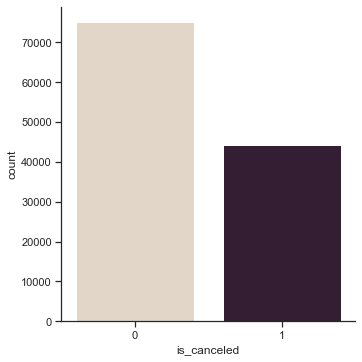

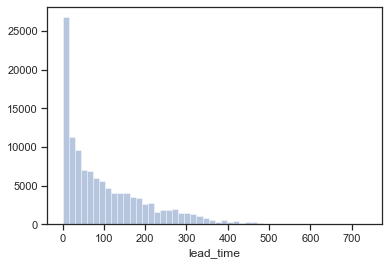

<Figure size 432x288 with 0 Axes>

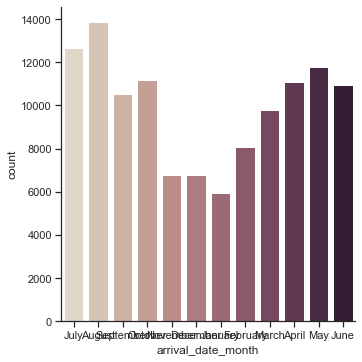

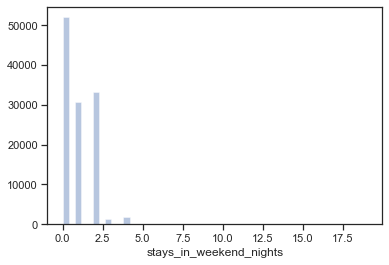

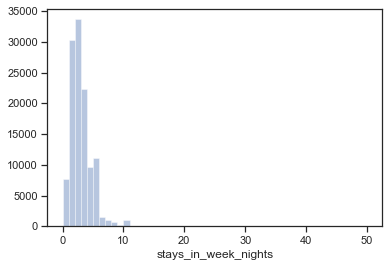

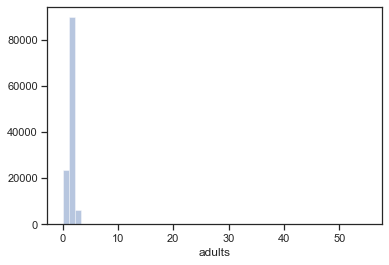

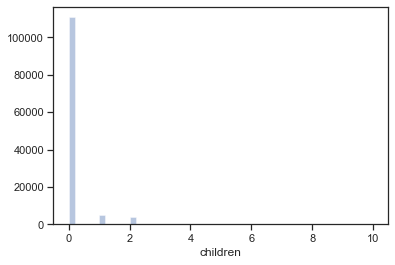

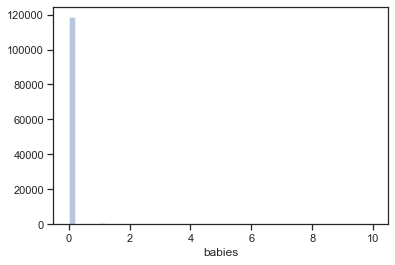

<Figure size 432x288 with 0 Axes>

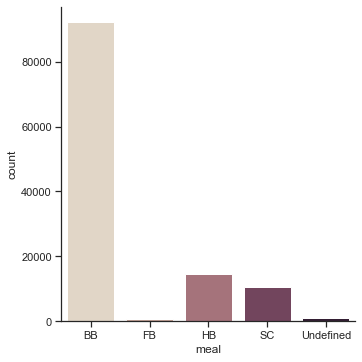

<Figure size 432x288 with 0 Axes>

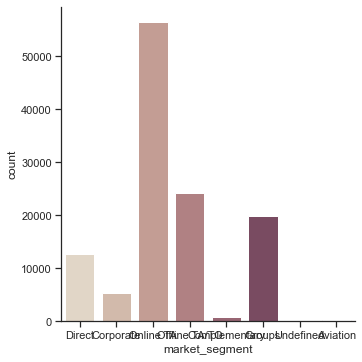

<Figure size 432x288 with 0 Axes>

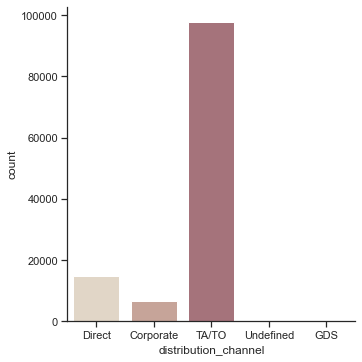

<Figure size 432x288 with 0 Axes>

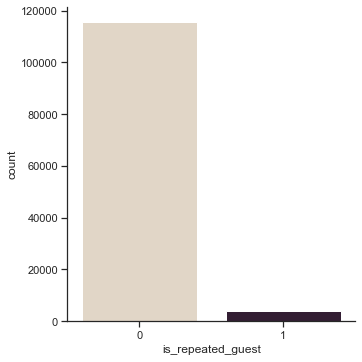

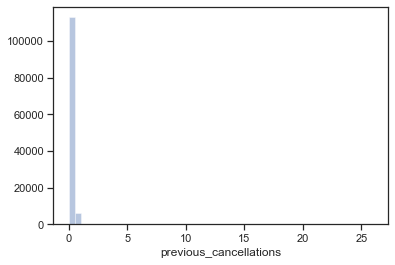

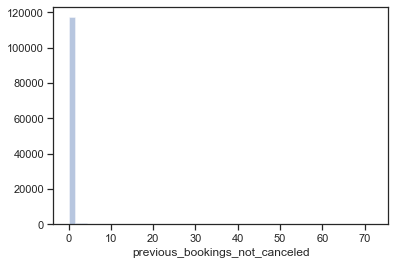

<Figure size 432x288 with 0 Axes>

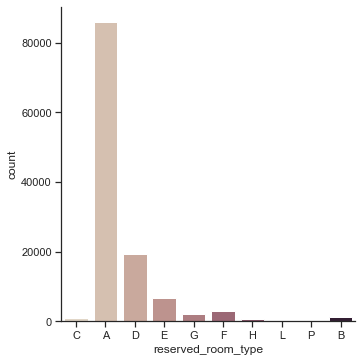

<Figure size 432x288 with 0 Axes>

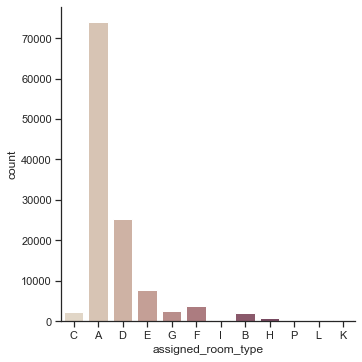

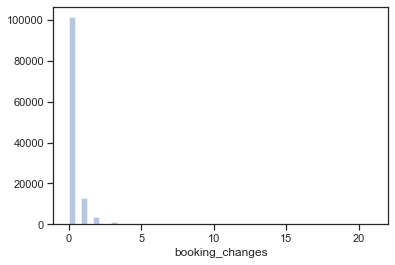

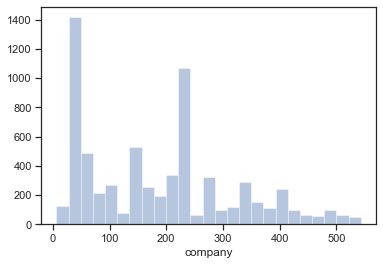

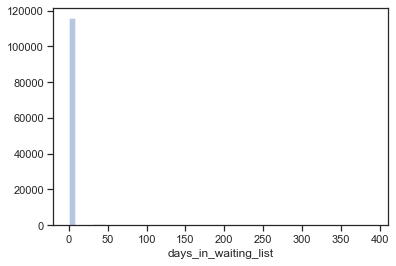

<Figure size 432x288 with 0 Axes>

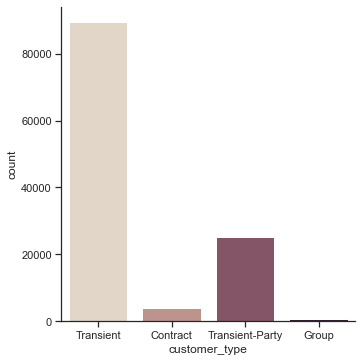

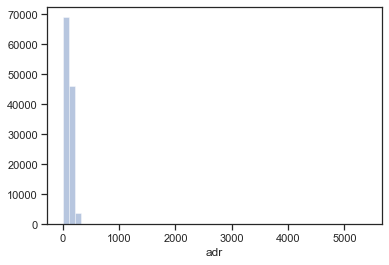

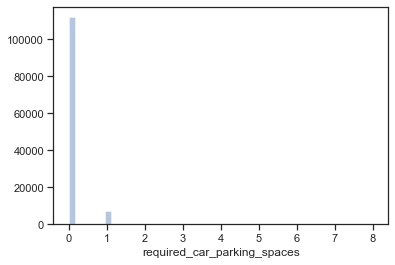

<Figure size 432x288 with 0 Axes>

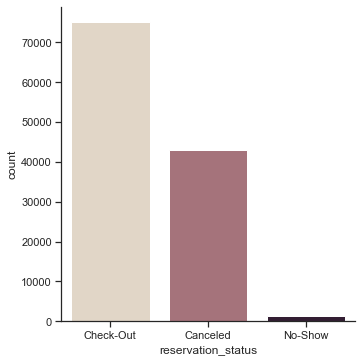

<Figure size 432x288 with 0 Axes>

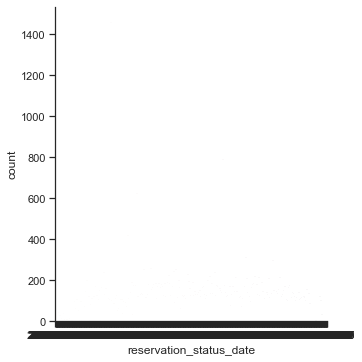

In [24]:
for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        print(temp.columns[i])
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')
    else:
        plt.figure()
        sns_plot = sns.catplot(x=temp.columns[i], kind="count", palette="ch:.25", data=temp)
        sns_plot.savefig(temp.columns[i]+'.png')

In [25]:
# Plotting All the Transformed Variables 
os.chdir(r'C:\Users\yogal\Projects\Coaching\29July_Materials\ML Algorithms - Copy\Random Forest')
if not os.path.exists('Transformed Plots'):
    os.makedirs('Transformed Plots')
os.chdir(r'C:\Users\yogal\Projects\Coaching\29July_Materials\ML Algorithms - Copy\Random Forest\Transformed Plots')

C:\Users\yogal\miniconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yogal\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


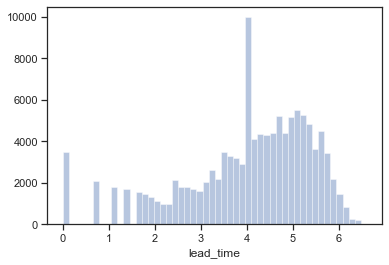

In [26]:
# Log transformation with mean Imputation for Non-Uniform Variables
log_mean_transform_var=['lead_time']


import time
for i in range(0,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        logtransform=np.log(temp[temp.columns[i]])
        logtransform = logtransform.replace([np.inf, -np.inf], np.nan)
        logtransform = mean_imp.fit_transform(pd.DataFrame(logtransform))
        temp[temp.columns[i]]=logtransform
        temp[temp.columns[i]].fillna(0, inplace = True) 

for i in range(1,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')


### Feature Selection

#### Numerical feature selection

In [27]:
numeric_variables = num_data.columns
numeric_variables

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces'],
      dtype='object')

In [28]:
temp.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces
count,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,6797.000000,119390.000000,119390.000000,119390.000000
mean,3.994735,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,189.266735,2.321149,101.831122,0.062518
std,1.429553,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,131.655015,17.594721,50.535790,0.245291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,-6.380000,0.000000
25%,3.295837,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,69.290000,0.000000
50%,4.234107,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.000000,0.000000,94.575000,0.000000
75%,5.075174,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270.000000,0.000000,126.000000,0.000000
max,6.602588,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,543.000000,391.000000,5400.000000,8.000000


## To check for the highly correlated variable

In [29]:
# Create correlation matrix
corr_matrix = temp[numeric_variables].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7 & less than -0.7
to_drop_pos = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_neg = [column for column in upper.columns if any(upper[column] < -0.7)]
print(to_drop_neg)
print(to_drop_pos)

[]
[]


<ipython-input-29-f39f320fd897>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [30]:
np.ones_like(corr_matrix, dtype=np.bool)

<ipython-input-30-225188f67e05>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones_like(corr_matrix, dtype=np.bool)


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,

<ipython-input-31-421f93520688>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))


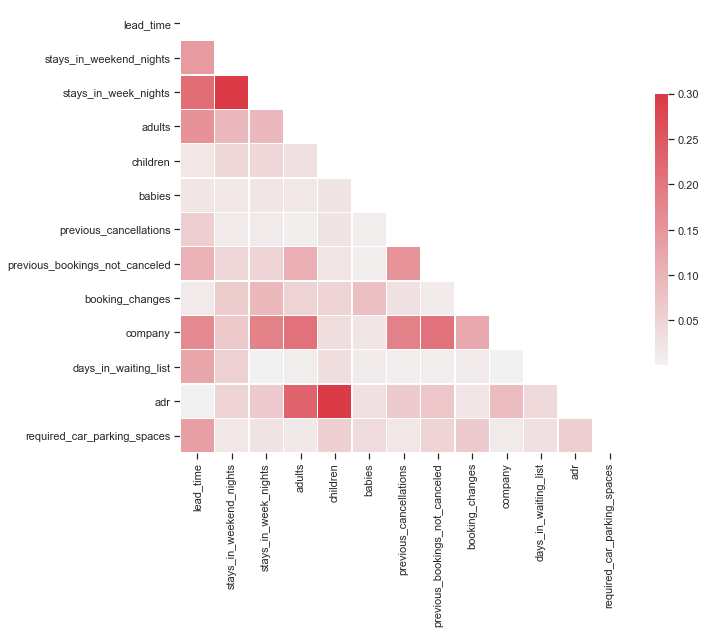

In [31]:
plt.figure(figsize=(10,10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns_plot=sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns_plot.figure.savefig('correlation.png')
# Fill na values with Numeric value as 0
for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        temp[temp.columns[i]].fillna(0, inplace = True) 


In [32]:
temp.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [33]:
# Drop NaN Value from the temp variable
        
temp=temp.dropna(how='any') 

X = temp.drop(temp.columns[1],axis=1)
y = temp[temp.columns[1]]
y =np.where(y =='0',0,1)

In [34]:
numeric_variables

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces'],
      dtype='object')

## n_estimators :
 - This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

In [ ]:
numeric_variables

In [ ]:
X

In [36]:
X[numeric_variables].head(5)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces
0,5.834811,0,0,2.0,0.0,0,0,0,3,0.0,0,0.0,0
1,6.602588,0,0,2.0,0.0,0,0,0,4,0.0,0,0.0,0
2,1.945910,0,1,1.0,0.0,0,0,0,0,0.0,0,75.0,0
3,2.564949,0,1,1.0,0.0,0,0,0,0,0.0,0,75.0,0
4,2.639057,0,2,2.0,0.0,0,0,0,0,0.0,0,98.0,0


In [37]:
%%time
# Random Forest with gini 
rf_model_feature_select = RandomForestClassifier(n_estimators=100) 
  
# Performing training 
rf_model_feature_select.fit(X[numeric_variables], y)

Wall time: 22.3 s


RandomForestClassifier()

In [38]:
print(rf_model_feature_select.feature_importances_)

[0.36107258 0.02917607 0.05532655 0.01963211 0.01009325 0.00162786
 0.06573259 0.01090988 0.03627053 0.01392742 0.01325872 0.35213742
 0.030835  ]


In [39]:
rf_p_values_num = pd.Series(rf_model_feature_select.feature_importances_,index = X[numeric_variables].columns)
rf_p_values_num.sort_values(ascending = False , inplace = True)
rf_p_values_num

lead_time                         0.361073
adr                               0.352137
previous_cancellations            0.065733
stays_in_week_nights              0.055327
booking_changes                   0.036271
required_car_parking_spaces       0.030835
stays_in_weekend_nights           0.029176
adults                            0.019632
company                           0.013927
days_in_waiting_list              0.013259
previous_bookings_not_canceled    0.010910
children                          0.010093
babies                            0.001628
dtype: float64

C:\Users\yogal\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


{'babies'}


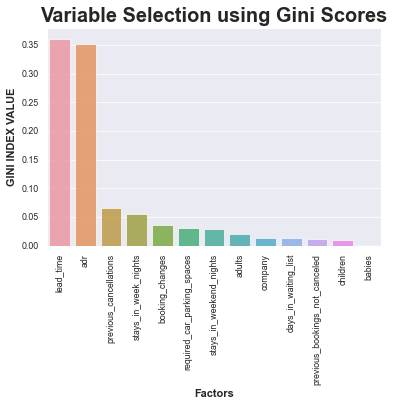

In [40]:
plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(rf_p_values_num.index[rf_p_values_num>0],rf_p_values_num[rf_p_values_num>0],alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 11, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 11, weight = 'bold')
sns_plot.set_title("Variable Selection using Gini Scores", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('GINI_INDEX'+'.png')

rf_selected_num=rf_p_values_num.index[rf_p_values_num>0.01]
rf_rejected_num=set(X[numeric_variables].columns.values).difference(rf_selected_num)
print(rf_rejected_num)

#### categorical feature selection

[0.05498972 0.18554924 0.05835391 0.3140454  0.06365206 0.01594334
 0.06979556 0.1519501  0.08572067]


C:\Users\yogal\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Index([], dtype='object')


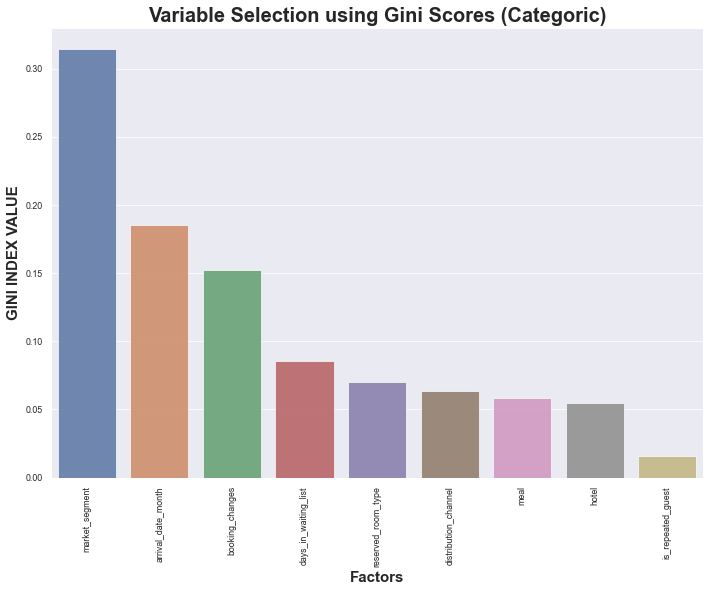

In [41]:
#temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]] = temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]].astype('str')

# Selecting Categorical Variables alone for Variable Selection
t=temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]]
# Dropping off NaN Values if Any
t=t.dropna(how='any')
del t['is_canceled']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(0,len(t.columns)):
    t.iloc[:,i] = le.fit_transform(t.iloc[:,i])
# Using GINI to decide Variables for Categoric Variables

rf_model_cat = RandomForestClassifier(n_estimators=100) 
rf_model_cat.fit(t, y) 
print(rf_model_cat.feature_importances_)
rf_p_values_cat = pd.Series(rf_model_cat.feature_importances_,index = t.columns)
rf_p_values_cat.sort_values(ascending = False , inplace = True)
rf_p_values_cat.index
plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(rf_p_values_cat.index,rf_p_values_cat,alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 15, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 15, weight = 'bold')
sns_plot.set_title("Variable Selection using Gini Scores (Categoric)", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('GINI_INDEX_Categoric'+'.png')

rf_selected_cat=rf_p_values_cat.index[rf_p_values_cat>0.0]
rf_rejected_cat=rf_p_values_cat.index[rf_p_values_cat==0]


print(rf_rejected_cat)

In [42]:
rejected_variables=[]
rejected_variables.extend(to_drop_pos)
rejected_variables.extend(to_drop_neg)
rejected_variables.extend(rf_rejected_num)
rejected_variables.extend(rf_rejected_cat)

In [43]:
rejected_variables

['babies']

In [44]:
print(set(temp.columns).difference(rejected_variables))

final_selection=set(temp.columns).difference(rejected_variables)
final_selection.remove('is_canceled')

{'is_repeated_guest', 'previous_bookings_not_canceled', 'reservation_status', 'reserved_room_type', 'lead_time', 'booking_changes', 'arrival_date_month', 'hotel', 'is_canceled', 'stays_in_week_nights', 'stays_in_weekend_nights', 'days_in_waiting_list', 'distribution_channel', 'adr', 'previous_cancellations', 'company', 'required_car_parking_spaces', 'meal', 'market_segment', 'reservation_status_date', 'children', 'adults', 'assigned_room_type', 'customer_type'}


In [45]:
temp[final_selection].head()

,is_repeated_guest,previous_bookings_not_canceled,reservation_status,reserved_room_type,lead_time,booking_changes,arrival_date_month,hotel,stays_in_week_nights,stays_in_weekend_nights,days_in_waiting_list,distribution_channel,adr,previous_cancellations,company,required_car_parking_spaces,meal,market_segment,reservation_status_date,children,adults,assigned_room_type,customer_type
0,0,0,Check-Out,C,5.834811,3,July,Resort Hotel,0,0,0,Direct,0.0,0,0.0,0,BB,Direct,2015-07-01,0.0,2.0,C,Transient
1,0,0,Check-Out,C,6.602588,4,July,Resort Hotel,0,0,0,Direct,0.0,0,0.0,0,BB,Direct,2015-07-01,0.0,2.0,C,Transient
2,0,0,Check-Out,A,1.945910,0,July,Resort Hotel,1,0,0,Direct,75.0,0,0.0,0,BB,Direct,2015-07-02,0.0,1.0,C,Transient
3,0,0,Check-Out,A,2.564949,0,July,Resort Hotel,1,0,0,Corporate,75.0,0,0.0,0,BB,Corporate,2015-07-02,0.0,1.0,A,Transient
4,0,0,Check-Out,A,2.639057,0,July,Resort Hotel,2,0,0,TA/TO,98.0,0,0.0,0,BB,Online TA,2015-07-03,0.0,2.0,A,Transient


In [46]:
temp[final_selection].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_repeated_guest               119390 non-null  object 
 1   previous_bookings_not_canceled  119390 non-null  int64  
 2   reservation_status              119390 non-null  object 
 3   reserved_room_type              119390 non-null  object 
 4   lead_time                       119390 non-null  float64
 5   booking_changes                 119390 non-null  int64  
 6   arrival_date_month              119390 non-null  object 
 7   hotel                           119390 non-null  object 
 8   stays_in_week_nights            119390 non-null  int64  
 9   stays_in_weekend_nights         119390 non-null  int64  
 10  days_in_waiting_list            119390 non-null  int64  
 11  distribution_channel            119390 non-null  object 
 12  adr             

#### One Hot Encoding

In [47]:
num_data = temp[temp.columns[temp.dtypes!='object']]
cat_data = temp[temp.columns[temp.dtypes=='object']]
del cat_data['is_canceled']

In [48]:
num_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces
0,5.834811,0,0,2.0,0.0,0,0,0,3,0.0,0,0.0,0
1,6.602588,0,0,2.0,0.0,0,0,0,4,0.0,0,0.0,0
2,1.945910,0,1,1.0,0.0,0,0,0,0,0.0,0,75.0,0
3,2.564949,0,1,1.0,0.0,0,0,0,0,0.0,0,75.0,0
4,2.639057,0,2,2.0,0.0,0,0,0,0,0.0,0,98.0,0


In [49]:
cat_data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,0,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,0,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,0,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,0,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,0,A,A,Transient,Check-Out,2015-07-03


In [50]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False)
dummydata = enc.fit_transform(cat_data)
dummydata = pd.DataFrame(dummydata)
names = enc.get_feature_names(input_features=list(cat_data.columns))
dummydata.columns = names
dummydata.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,reservation_status_date_2014-10-17,reservation_status_date_2014-11-18,reservation_status_date_2015-01-01,reservation_status_date_2015-01-02,reservation_status_date_2015-01-18,reservation_status_date_2015-01-20,reservation_status_date_2015-01-21,reservation_status_date_2015-01-22,reservation_status_date_2015-01-28,reservation_status_date_2015-01-29,reservation_status_date_2015-01-30,reservation_status_date_2015-02-02,reservation_status_date_2015-02-05,reservation_status_date_2015-02-06,reservation_status_date_2015-02-09,reservation_status_date_2015-02-10,reservation_status_date_2015-02-11,reservation_status_date_2015-02-12,reservation_status_date_2015-02-17,reservation_status_date_2015-02-19,reservation_status_date_2015-02-20,reservation_status_date_2015-02-23,reservation_status_date_2015-02-24,reservation_status_date_2015-02-25,reservation_status_date_2015-02-26,reservation_status_date_2015-02-27,reservation_status_date_2015-03-03,reservation_status_date_2015-03-04,reservation_status_date_2015-03-05,reservation_status_date_2015-03-06,reservation_status_date_2015-03-09,reservation_status_date_2015-03-10,reservation_status_date_2015-03-11,reservation_status_date_2015-03-12,reservation_status_date_2015-03-13,reservation_status_date_2015-03-17,reservation_status_date_2015-03-18,reservation_status_date_2015-03-23,reservation_status_date_2015-03-24,reservation_status_date_2015-03-25,reservation_status_date_2015-03-28,reservation_status_date_2015-03-29,reservation_status_date_2015-03-30,reservation_status_date_2015-03-31,reservation_status_date_2015-04-02,reservation_status_date_2015-04-03,reservation_status_date_2015-04-04,reservation_status_date_2015-04-05,reservation_status_date_2015-04-06,reservation_status_date_2015-04-07,reservation_status_date_2015-04-08,reservation_status_date_2015-04-10,reservation_status_date_2015-04-11,reservation_status_date_2015-04-13,reservation_status_date_2015-04-14,reservation_status_date_2015-04-15,reservation_status_date_2015-04-16,reservation_status_date_2015-04-17,reservation_status_date_2015-04-18,reservation_status_date_2015-04-20,reservation_status_date_2015-04-21,reservation_status_date_2015-04-22,reservation_status_date_2015-04-23,reservation_status_date_2015-04-24,reservation_status_date_2015-04-25,reservation_status_date_2015-04-27,reservation_status_date_2015-04-28,reservation_status_date_2015-04-29,reservation_status_date_2015-04-30,reservation_status_date_2015-05-01,reservation_status_date_2015-05-04,reservation_status_date_2015-05-05,reservation_status_date_2015-05-06,reservation_status_da

In [51]:
dummydata=dummydata.reset_index(drop=True)
num_data=num_data.reset_index(drop=True)
X_log=pd.concat([num_data,dummydata], axis=1)

In [52]:
X_log.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,reservation_status_date_2014-10-17,reservation_status_date_2014-11-18,reservation_status_date_2015-01-01,reservation_status_date_2015-01-02,reservation_status_date_2015-01-18,reservation_status_date_2015-01-20,reservation_status_date_2015-01-21,reservation_status_date_2015-01-22,reservation_status_date_2015-01-28,reservation_status_date_2015-01-29,reservation_status_date_2015-01-30,reservation_status_date_2015-02-02,reservation_status_date_2015-02-05,reservation_status_date_2015-02-06,reservation_status_date_2015-02-09,reservation_status_date_2015-02-10,reservation_status_date_2015-02-11,reservation_status_date_2015-02-12,reservation_status_date_2015-02-17,reservation_status_date_2015-02-19,reservation_status_date_2015-02-20,reservation_status_date_2015-02-23,reservation_status_date_2015-02-24,reservation_status_date_2015-02-25,reservation_status_date_2015-02-26,reservation_status_date_2015-02-27,reservation_status_date_2015-03-03,reservation_status_date_2015-03-04,reservation_status_date_2015-03-05,reservation_status_date_2015-03-06,reservation_status_date_2015-03-09,reservation_status_date_2015-03-10,reservation_status_date_2015-03-11,reservation_status_date_2015-03-12,reservation_status_date_2015-03-13,reservation_status_date_2015-03-17,reservation_status_date_2015-03-18,reservation_status_date_2015-03-23,reservation_status_date_2015-03-24,reservation_status_date_2015-03-25,reservation_status_date_2015-03-28,reservation_status_date_2015-03-29,reservation_status_date_2015-03-30,reservation_status_date_2015-03-31,reservation_status_date_2015-04-02,reservation_status_date_2015-04-03,reservation_status_date_2015-04-04,reservation_status_date_2015-04-05,reservation_status_date_2015-04-06,reservation_status_date_2015-04-07,reservation_status_date_2015-04-08,reservation_status_date_2015-04-10,reservation_status_date_2015-04-11,reservation_status_date_2015-04-13,reservation_status_date_2015-04-14,reservation_status_date_2015-04-15,reservation_status_date_2015-04-16,reservation_status_date_2015-04-17,reservation_status_date_2015-04-18,reservation_status_date_2015-04-20,reservation_status_date_2015-04-21,reservation_status_date_2015-04-22,reservation_status_date_2015-04-23,reservation_status_date_2015-04-24,reservation_status_date_2015-04-25,reservation_status_date_2015-04-27,reservation_status_date_2015-04-28,reservation_status_dat

### Train & Test Split

In [53]:
RANDOM_SEED = 30
X_train,X_test, y_train,y_test = train_test_split(X_log, y, test_size=0.20, random_state=RANDOM_SEED)

In [54]:
print(temp.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119390, 25)
(95512, 1002)
(23878, 1002)
(95512,)
(23878,)


## Model Building - RF1

In [56]:
?RandomForestClassifier

In [74]:
%%time
# Create Decision Tree classifer object
rft = RandomForestClassifier(max_depth=2, random_state=0)
# Fit the random search model
rft.fit(X_train,y_train)

Wall time: 6.37 s


RandomForestClassifier(max_depth=2, random_state=0)

In [58]:
#Predict the response for train dataset
y_pred_train = rft.predict(X_train)
#Predict the response for test dataset
y_pred_test= rft.predict(X_test)

## Train Performance Metrics - Technical KPIs

In [59]:
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

print( "confusion_matrix train data\n\n",confusion_matrix_train,"\n")

confusion_matrix train data

 [[60244     0]
 [35123   145]] 



- macro average (averaging the unweighted mean per label),
- weighted average (averaging the support-weighted mean     per label),
- binary classification, recall of the positive class is also known as "sensitivity"; recall of the negative class is"specificity".

In [60]:
print( "Classification report train data\n\n" ,classification_report(y_train, y_pred_train))

Classification report train data

               precision    recall  f1-score   support

           0       0.63      1.00      0.77     60244
           1       1.00      0.00      0.01     35268

    accuracy                           0.63     95512
   macro avg       0.82      0.50      0.39     95512
weighted avg       0.77      0.63      0.49     95512



In [62]:
((60244/95512)*0.63)+((35268/95512)*1)

0.7666232515286038

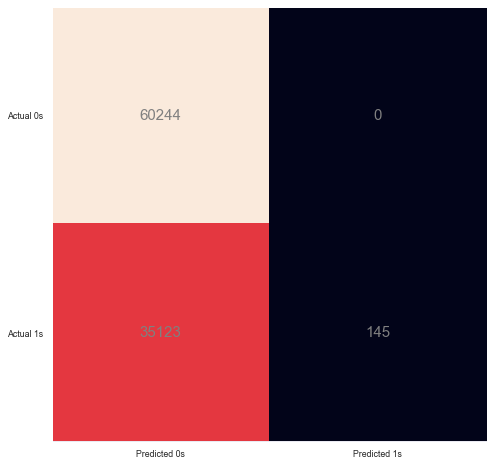

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix_train)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix_train[i, j], ha='center', va='center', color='grey', fontsize=15)
plt.show()

## Test Performance Metrics - Technical KPIs

In [64]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print( "Confusion Matrix Test data\n\n","="*5,'\n',confusion_matrix_test,"\n")
tn, fp, fn, tp = confusion_matrix_test.ravel()
print('\n', "="*5, '\n')
print("Other Algo KPIs", '\n')
print('True Negative',tn)
print('False Positive',fp)
print('False Negative',fn)
print('True Positive',tp)


Confusion Matrix Test data

 ===== 
 [[14922     0]
 [ 8921    35]] 


 ===== 

Other Algo KPIs 

True Negative 14922
False Positive 0
False Negative 8921
True Positive 35


## For now, think of them as :

- ***Recall***: How many of the cancellations in the dataset , were we able to identify correctly as cancellation.
- ***Precision***: How many of our predicted cancellations are actually cancelled.

![](https://media-exp1.licdn.com/dms/image/C5612AQFvGTG7RG384A/article-inline_image-shrink_1000_1488/0/1520208149148?e=1632960000&v=beta&t=G4jh6nAappddC6WPDnTDaKF3Gr6RvN7lvfDKNFhQoPc)
![](https://www.gstatic.com/education/formulas2/355397047/en/f1_score.svg)

In [63]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".

Classification report train data

               precision    recall  f1-score   support

           0       0.63      1.00      0.77     14922
           1       1.00      0.00      0.01      8956

    accuracy                           0.63     23878
   macro avg       0.81      0.50      0.39     23878
weighted avg       0.77      0.63      0.48     23878



In [ ]:
((14922/23878)*(0.63))+((8956/23878)*(1.0))

In [ ]:
((14922/23878)*(1))+((8956/23878)*(0.003))

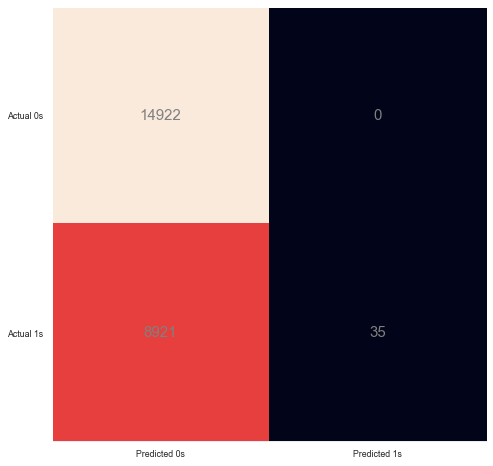

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix_test)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix_test[i, j], ha='center', va='center', color='grey', fontsize=15)
plt.show()

## Code Block to generate the plots for Random Forest

In [73]:
os.chdir(r'C:\Users\yogal\Projects\Coaching\29July_Materials\ML Algorithms - Copy\Random Forest')

if not os.path.exists('Tree Plots'):
    os.mkdir('Tree Plots')
os.chdir(r'C:\Users\yogal\Projects\Coaching\29July_Materials\ML Algorithms - Copy\Random Forest\Tree Plots')

import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in rft.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=X_train.columns.values,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1

## Model Building - RF2

In [ ]:
?RandomForestClassifier

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Screenshot-2020-03-04-at-15.07.03-768x516.png)

In [75]:
%%time
# Create Decision Tree classifer object
rft = RandomForestClassifier(max_depth=5, random_state=0)
# Fit the random search model
rft.fit(X_train,y_train)

Wall time: 12.2 s


RandomForestClassifier(max_depth=5, random_state=0)

In [77]:
X_train.shape

(95512, 1002)

In [67]:
#Predict the response for train dataset
y_pred_train = rft.predict(X_train)
#Predict the response for test dataset
y_pred_test= rft.predict(X_test)

## Train Performance Metrics - Technical KPIs

In [68]:
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

print( "confusion_matrix train data\n\n",confusion_matrix_train,"\n")

confusion_matrix train data

 [[60244     0]
 [ 3658 31610]] 



- macro average (averaging the unweighted mean per label),
- weighted average (averaging the support-weighted mean     per label),
- binary classification, recall of the positive class is also known as "sensitivity"; recall of the negative class is"specificity".

In [ ]:
print( "Classification report train data\n\n" ,classification_report(y_train, y_pred_train))

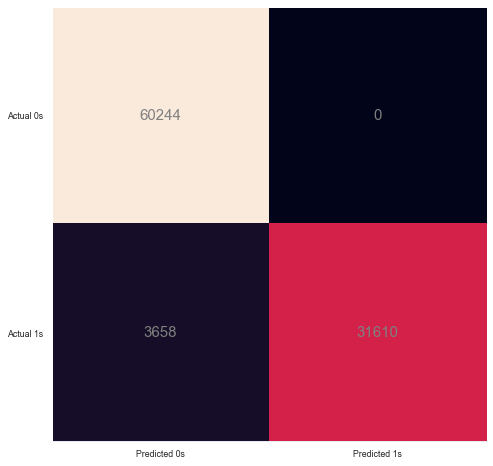

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix_train)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix_train[i, j], ha='center', va='center', color='grey', fontsize=15)
plt.show()

## Test Performance Metrics - Technical KPIs

In [70]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print( "Confusion Matrix Test data\n\n","="*5,'\n',confusion_matrix_test,"\n")
tn, fp, fn, tp = confusion_matrix_test.ravel()
print('\n', "="*5, '\n')
print("Other Algo KPIs", '\n')
print('True Negative',tn)
print('False Positive',fp)
print('False Negative',fn)
print('True Positive',tp)

Confusion Matrix Test data

 ===== 
 [[14922     0]
 [  923  8033]] 


 ===== 

Other Algo KPIs 

True Negative 14922
False Positive 0
False Negative 923
True Positive 8033


In [71]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".

Classification report train data

               precision    recall  f1-score   support

           0       0.94      1.00      0.97     14922
           1       1.00      0.90      0.95      8956

    accuracy                           0.96     23878
   macro avg       0.97      0.95      0.96     23878
weighted avg       0.96      0.96      0.96     23878



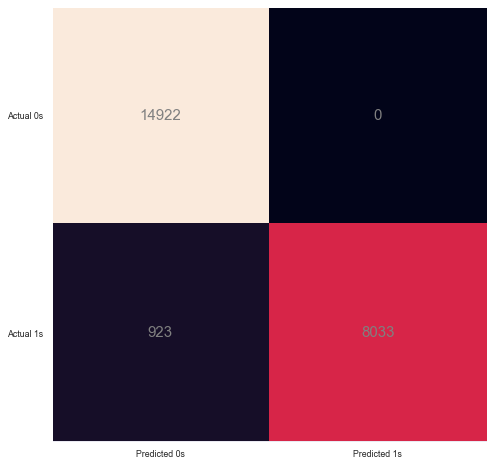

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix_test)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix_test[i, j], ha='center', va='center', color='grey', fontsize=15)
plt.show()